In [1]:
!pip install niapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 3.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import joblib

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

import niapy

from niapy.problems import Problem
from niapy.task import Task
from niapy.algorithms.basic import CamelAlgorithm

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA

Mounted at /content/drive
/content/drive/MyDrive/TA


In [3]:
class SVRFeatureSelection(Problem):
    def __init__(self, X_train, y_train, alpha=0.8):
        super().__init__(dimension=X_train.shape[1], lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train
        self.alpha = alpha

    def _evaluate(self, x):
        selected = x > 0.5
        num_selected = selected.sum()
        if num_selected == 0:
            return 1.0
        accuracy = cross_val_score(SVR(kernel="linear"), self.X_train.loc[:, selected], self.y_train, cv=10, n_jobs=-1,scoring='r2').mean()
        #accuracy = cross_val_score(SVR(kernel="linear"), self.X_train[:, selected], self.y_train, cv=10, n_jobs=-1, scoring='r2').mean()
        score = 1 - accuracy
        num_features = self.X_train.shape[1]
        return (self.alpha * score) + (1 - self.alpha) * (num_selected / num_features)

In [4]:
#LOAD DATASET

df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [5]:
df_train.isna().any().any()

False

In [6]:
print("Contains Inf:", np.isinf(df_train).any().any())

infinite_columns = df_train.columns[np.isinf(df_train).any()]

print("\nColumns containing infinite values:")
print(infinite_columns.tolist())

Contains Inf: False

Columns containing infinite values:
[]


In [7]:
X_train = df_train.drop(columns=["Pic50"])
y_train = df_train["Pic50"]

X_test=df_test.drop(["Pic50"],axis=1)
y_test = df_test['Pic50']

In [8]:
problem = SVRFeatureSelection(X_train, y_train)
task = Task(problem, max_iters=20)
# algorithm = CamelAlgorithm(population_size=10, seed=1234)
algorithm = CamelAlgorithm(population_size=30, burden_factor=0.5, supply_init=20, endurance_init=20, seed=1234)
best_features, best_fitness = algorithm.run(task)

In [9]:
feature_name = X_train.columns

selected_features = best_features > 0.5
print('Number of selected features:', selected_features.sum())
print('Selected features:', ', '.join(feature_name[selected_features].tolist()))

Number of selected features: 425
Selected features: PubchemFP0, PubchemFP1, PubchemFP7, PubchemFP8, PubchemFP9, PubchemFP11, PubchemFP12, PubchemFP14, PubchemFP16, PubchemFP17, PubchemFP18, PubchemFP19, PubchemFP20, PubchemFP22, PubchemFP25, PubchemFP26, PubchemFP27, PubchemFP30, PubchemFP35, PubchemFP37, PubchemFP38, PubchemFP42, PubchemFP43, PubchemFP45, PubchemFP46, PubchemFP47, PubchemFP49, PubchemFP52, PubchemFP56, PubchemFP58, PubchemFP61, PubchemFP67, PubchemFP68, PubchemFP69, PubchemFP70, PubchemFP71, PubchemFP72, PubchemFP73, PubchemFP74, PubchemFP77, PubchemFP83, PubchemFP85, PubchemFP86, PubchemFP87, PubchemFP89, PubchemFP90, PubchemFP91, PubchemFP92, PubchemFP94, PubchemFP95, PubchemFP98, PubchemFP99, PubchemFP100, PubchemFP101, PubchemFP102, PubchemFP108, PubchemFP110, PubchemFP114, PubchemFP115, PubchemFP117, PubchemFP118, PubchemFP119, PubchemFP120, PubchemFP122, PubchemFP124, PubchemFP126, PubchemFP127, PubchemFP129, PubchemFP130, PubchemFP136, PubchemFP138, PubchemFP14

In [10]:
# Model SVR untuk regresi
model_all = SVR(kernel='linear')
# Menghitung akurasi menggunakan cross-validation
score_all = cross_val_score(model_all, X_train, y_train, scoring='r2', cv=10, n_jobs=-1).mean()
print('All Features R2 Accuracy:', score_all)


All Features R2 Accuracy: 0.4016113941569273


In [11]:
model_selected = SVR(kernel='linear')
X_train_selected = X_train.iloc[:, selected_features]
score_select = cross_val_score(model_selected, X_train_selected, y_train, scoring='r2', cv=10, n_jobs=-1).mean()
print('Selected Features R2 Accuracy:', score_select)

Selected Features R2 Accuracy: 0.558405527946007


In [12]:
selected_feature = feature_name[selected_features].tolist()
joblib.dump(selected_feature,"selected_feature_linear.pkl")

['selected_feature_linear.pkl']

In [13]:
feature_selected = joblib.load("selected_feature_linear.pkl")
feature_selected

['PubchemFP0',
 'PubchemFP1',
 'PubchemFP7',
 'PubchemFP8',
 'PubchemFP9',
 'PubchemFP11',
 'PubchemFP12',
 'PubchemFP14',
 'PubchemFP16',
 'PubchemFP17',
 'PubchemFP18',
 'PubchemFP19',
 'PubchemFP20',
 'PubchemFP22',
 'PubchemFP25',
 'PubchemFP26',
 'PubchemFP27',
 'PubchemFP30',
 'PubchemFP35',
 'PubchemFP37',
 'PubchemFP38',
 'PubchemFP42',
 'PubchemFP43',
 'PubchemFP45',
 'PubchemFP46',
 'PubchemFP47',
 'PubchemFP49',
 'PubchemFP52',
 'PubchemFP56',
 'PubchemFP58',
 'PubchemFP61',
 'PubchemFP67',
 'PubchemFP68',
 'PubchemFP69',
 'PubchemFP70',
 'PubchemFP71',
 'PubchemFP72',
 'PubchemFP73',
 'PubchemFP74',
 'PubchemFP77',
 'PubchemFP83',
 'PubchemFP85',
 'PubchemFP86',
 'PubchemFP87',
 'PubchemFP89',
 'PubchemFP90',
 'PubchemFP91',
 'PubchemFP92',
 'PubchemFP94',
 'PubchemFP95',
 'PubchemFP98',
 'PubchemFP99',
 'PubchemFP100',
 'PubchemFP101',
 'PubchemFP102',
 'PubchemFP108',
 'PubchemFP110',
 'PubchemFP114',
 'PubchemFP115',
 'PubchemFP117',
 'PubchemFP118',
 'PubchemFP119',
 'P

In [14]:
task.convergence_data()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([0.45736826, 0.45736826, 0.45736826, 0.45205985, 0.45205985,
        0.45205985, 0.45205985, 0.45205985, 0.45205985, 0.45205985,
        0.45205985, 0.45205985, 0.45183283, 0.45183283, 0.45183283,
        0.45183283, 0.45183283, 0.45183283, 0.45122629, 0.44975685]))

In [15]:
convergence_data = task.convergence_data()
convergence_data


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([0.45736826, 0.45736826, 0.45736826, 0.45205985, 0.45205985,
        0.45205985, 0.45205985, 0.45205985, 0.45205985, 0.45205985,
        0.45205985, 0.45205985, 0.45183283, 0.45183283, 0.45183283,
        0.45183283, 0.45183283, 0.45183283, 0.45122629, 0.44975685]))

In [16]:
joblib.dump(convergence_data,"convergence_data_linear.pkl")

['convergence_data_linear.pkl']

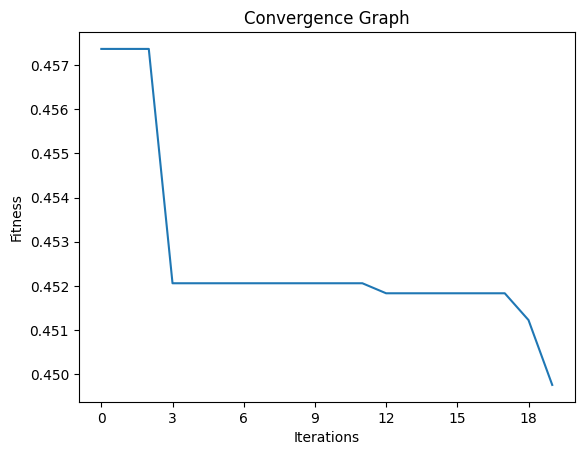

In [17]:
task.plot_convergence()